# LAB 6

# Background Theory for Lab Report

The lab covers several foundational concepts in data science, particularly focusing on regression analysis, gradient descent, feature scaling, and logistic regression. Below is a breakdown of the key topics and concepts used throughout the lab.

---

### 1. **Gradient Descent**
   - **Definition**: Gradient descent is an optimization algorithm used to minimize the cost function (or loss function) in machine learning models. It is used to find the optimal parameters (coefficients) by iteratively updating them in the direction of the negative gradient of the cost function.
   - **Formula**: The general update rule for gradient descent is:
     $$ \theta = \theta - \alpha \cdot \nabla J(\theta) $$
     Where:
     - \( \theta \) represents the model parameters (weights),
     - \( \alpha \) is the learning rate,
     - \( \nabla J(\theta) \) is the gradient of the cost function.

   - **Application**: Gradient descent is used in both linear and logistic regression to optimize model parameters by minimizing the error between predicted and actual values.

---

### 2. **Linear Regression**
   - **Definition**: Linear regression is a statistical method used to model the relationship between a dependent variable \( y \) and one or more independent variables \( x_1, x_2, ..., x_n \) by fitting a linear equation to the observed data.
   - **Formula**: The equation for a linear regression model is:
     $$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon $$
     Where:
     - \( y \) is the dependent variable,
     - \( x_1, x_2, ..., x_n \) are the independent variables (features),
     - \( \beta_0, \beta_1, ..., \beta_n \) are the model coefficients (parameters),
     - \( \epsilon \) is the error term (noise).

---

### 3. **Synthetic Data Generation**
   - **Definition**: Synthetic data refers to data that is artificially created rather than obtained through real-world observations. In regression problems, synthetic data is often used to test models or simulate different scenarios.
   - **Formula**: For the synthetic regression problem given in the lab:
     $$ y = x_1 + 10x_2 + 0.005x_3 + \text{noise} $$
     Where \( x_1 \), \( x_2 \), and \( x_3 \) are random variables and "noise" is random error sampled from a normal distribution.

---

### 4. **Feature Scaling**
   - **Definition**: Feature scaling is the process of standardizing the range of independent variables or features of the data. It is important for algorithms that are sensitive to the scale of data, such as gradient descent.
   - **Methods**:
     - **Standardization**: Converts the data into a distribution with a mean of 0 and a standard deviation of 1.
       $$ X' = \frac{X - \mu}{\sigma} $$
       Where:
       - \( \mu \) is the mean,
       - \( \sigma \) is the standard deviation.
     - **Min-Max Scaling**: Rescales the data so that the minimum and maximum values of the data are mapped to a specified range (usually [0, 1]).
       $$ X' = \frac{X - \min(X)}{\max(X) - \min(X)} $$

---

### 5. **Sum of Squared Errors (SSE)**
   - **Definition**: SSE is a metric used to measure the accuracy of a regression model. It represents the sum of the squared differences between the predicted values and the actual values.
   - **Formula**:
     $$ \text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
     Where:
     - \( y_i \) are the actual values,
     - \( \hat{y}_i \) are the predicted values.

---

### 6. **Sigmoid Function**
   - **Definition**: The sigmoid function is a mathematical function that maps any real-valued number to a value between 0 and 1. It is commonly used in logistic regression to model probabilities.
   - **Formula**:
     $$ \sigma(x) = \frac{1}{1 + e^{-x}} $$
     Where:
     - \( \sigma(x) \) is the output of the sigmoid function (probability),
     - \( e^{-x} \) is the exponential function.

---

### 7. **Logistic Regression**
   - **Definition**: Logistic regression is a statistical method used for binary classification problems. It models the probability of a binary outcome (e.g., 0 or 1) based on one or more predictor variables.
   - **Formula**: The logistic regression model is defined as:
     $$ P(y=1|x) = \sigma(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n) $$
     Where:
     - \( P(y=1|x) \) is the probability of the class being 1 given the features \( x \),
     - \( \sigma \) is the sigmoid function,
     - \( \beta_0, \beta_1, ..., \beta_n \) are the model coefficients (parameters).

---



### 8. **Prediction Using Logistic Regression**
   - **Definition**: After training a logistic regression model, predictions are made by computing the probability \( P(y = 1|x) \). If the probability exceeds a threshold (e.g., 0.5), the outcome is classified as 1, otherwise, it is classified as 0.
   - **Formula**: The prediction rule can be expressed as:
     $$ \hat{y} = 
     \begin{cases} 
     1 & \text{if } P(y=1|x) \geq 0.5 \\
     0 & \text{if } P(y=1|x) < 0.5
     \end{cases} $$

---

### Summary

This lab encompasses several key concepts of machine learning and data science:
- **Gradient Descent** for optimization,
- **Linear Regression** for modeling relationships between variables,
- **Feature Scaling** for improving the performance of gradient descent,
- **Logistic Regression** for classification problems,
- **Sigmoid Function** to model probabilities in logistic regression,
- **Synthetic Data Generation** to create datasets for experimentation, and
- **Prediction and Evaluation** of models, including the use of metrics like SSE 



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression


## 1. Minimum of a function using gradient descent:
#### Find the minimumvalue for y =(x- 6)^2 + sin(3x) using gradient descent. Decide stopping criteria on your own. Plot thegraph of the function and the current value (x, y) at every ten steps. Try out different value for learning rate and comment on the result. 

In [3]:


# Define the function y = (x - 6)^2 + sin(3x)
def f(x):
    return (x - 6)**2 + np.sin(3 * x)

# Define the derivative of the function with respect to x
def grad_f(x):
    return 2 * (x - 6) + 3 * np.cos(3 * x)

# Gradient Descent algorithm
def gradient_descent(initial_x, learning_rate, num_iterations):
    x_values = [initial_x]
    y_values = [f(initial_x)]

    x = initial_x
    for i in range(num_iterations):
        gradient = grad_f(x)
        x = x - learning_rate * gradient
        x_values.append(x)
        y_values.append(f(x))

        # # Print the values of (x, y) every 10 steps
        if i % 10 == 0:
            print(f"Step {i}, x = {x:.4f}, y = {f(x):.4f}")

    print(f"Min value of X: { x}")

    return x_values, y_values

# Plotting function
def plot_function_and_trajectory(x_values, y_values):
    # Generate a range of x values for plotting the function
    x_range = np.linspace(-10, 20, 400)
    y_range = f(x_range)

    # Create the plot
    plt.plot(x_range, y_range, label="Function f(x) = (x - 6)^2 + sin(3x)", color='blue')
    plt.scatter(x_values, y_values, color='red', label="Gradient Descent Steps", zorder=5)
    plt.plot(x_values, y_values, color='red', linestyle='-', zorder=4)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Gradient Descent Optimization')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution
initial_x = 0.0  # Starting point for gradient descent
learning_rate = 0.1  # Learning rate
num_iterations = 1000  # Number of iterations for gradient descent

# Perform gradient descent
x_values, y_values = gradient_descent(initial_x, learning_rate, num_iterations)

# Plot the function and the trajectory
plot_function_and_trajectory(x_values, y_values)


Step 0, x = 0.9000, y = 26.4374
Step 10, x = 4.5526, y = 2.9822
Step 20, x = 5.8034, y = -0.9527
Step 30, x = 5.8034, y = -0.9527
Step 40, x = 5.8034, y = -0.9527
Step 50, x = 5.8034, y = -0.9527
Step 60, x = 5.8034, y = -0.9527
Step 70, x = 5.8034, y = -0.9527
Step 80, x = 5.8034, y = -0.9527
Step 90, x = 5.8034, y = -0.9527
Step 100, x = 5.8034, y = -0.9527
Step 110, x = 5.8034, y = -0.9527
Step 120, x = 5.8034, y = -0.9527
Step 130, x = 5.8034, y = -0.9527
Step 140, x = 5.8034, y = -0.9527
Step 150, x = 5.8034, y = -0.9527
Step 160, x = 5.8034, y = -0.9527
Step 170, x = 5.8034, y = -0.9527
Step 180, x = 5.8034, y = -0.9527
Step 190, x = 5.8034, y = -0.9527
Step 200, x = 5.8034, y = -0.9527
Step 210, x = 5.8034, y = -0.9527
Step 220, x = 5.8034, y = -0.9527
Step 230, x = 5.8034, y = -0.9527
Step 240, x = 5.8034, y = -0.9527
Step 250, x = 5.8034, y = -0.9527
Step 260, x = 5.8034, y = -0.9527
Step 270, x = 5.8034, y = -0.9527
Step 280, x = 5.8034, y = -0.9527
Step 290, x = 5.8034, y = 

Find using gradient descent the best fit line for data points $(x1, x2, x3, y) = x1 + 10x2 + 0.005x3 + noise$

*Data Creation:*
 - create 500 sample points
 - x1 using normal distribution (mean = 2, std = 2.5)
 - x2 between 0 and 1 (uniform distribution)
 - x3 between 10,000 and 20,000 (uniform distribution)
 - noise = random error sampled from normal distribution; mean =0, std = 2

*Gradient Descent:*
 - Take random value of your choice for coefficients to start at
 - Stop at 100 iterations
 - Plot on graph how SSE changes with increase in iteration


In [4]:
np.random.seed(10)

In [5]:
x1 = np.random.normal(loc= 2, scale=2.5 , size=500)
x2 = np.random.uniform(low=0, high=1, size=500)
x3 = np.random.uniform(low=10000, high= 20000, size=500)
noise = np.random.normal(loc=0, scale=2)

# calculating the function
Y_true = x1 +  10* x2 +0.005 * x3 + noise



# 3. Regression using gradient descent:
 Find using gradient descent the best fit linefor a sample of synthetic data points generated above.
  Initialize the coefficient values as
-beta0 = (your_roll_number)*3/0.1,

-beta1 = (your_roll_number)*5/0.08,

-beta2 and

-beta3 random value of your liking.
 
### Plot SSE changed with increase in iterations. { 
Hint: Due to large feature value for x3 you will note that you are unable to use largelearning rate; take learning rate = 1e-11 and perform 1 million iterations (You may try higher learning rate and see what happens) 
} 


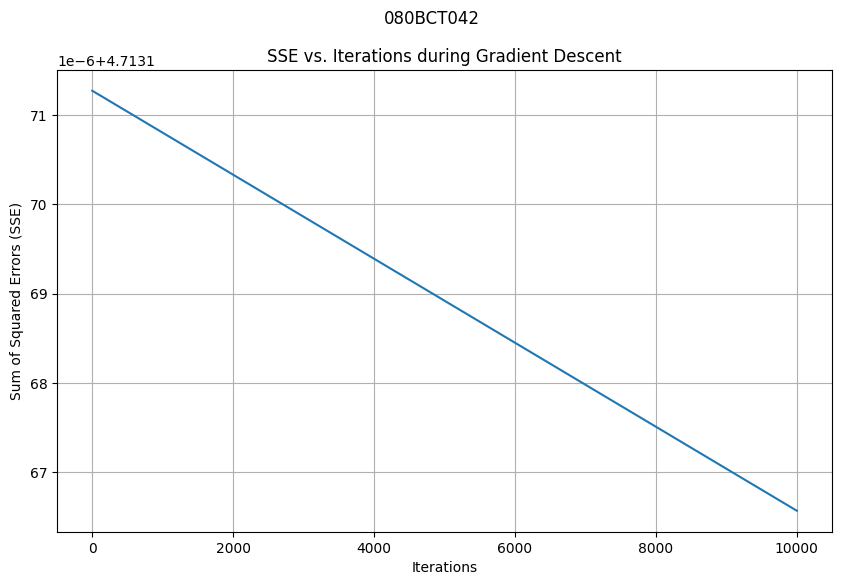

Final Coefficients after 10,000 iterations:
beta0: 1259.9999999795364
beta1: 2624.999999508873
beta2: 3.217333476030438
beta3: 0.980770821363074


In [16]:


# Initialize coefficients (random values for beta0, beta1, beta2, beta3)
roll_number = 42  # actual roll number
beta0 = roll_number * 3 / 0.1
beta1 = roll_number * 5 / 0.08
beta2 = np.random.randn()  # Coefficient for x2
beta3 = np.random.randn()  # Coefficient for x3
coeffs = np.array([beta0, beta1, beta2, beta3])

# Generate some data for x1, x2, x3, and Y_true (randomized for demonstration)
np.random.seed(0)  # For reproducibility
x1 = np.random.randn(500)
x2 = np.random.randn(500)
x3 = np.random.randn(500)
Y_true = beta0 + beta1 * x1 + beta2 * x2 + beta3 * x3 + np.random.randn(500) * 0.1  # Some noise added

def grad_descent(coeff, x1, x2, x3, Y_true, learning_rate=np.exp(-11), iterations=100):
    # Design matrix X (adding a column of ones for the intercept term)
    X = np.hstack((np.ones((500, 1)), x1.reshape(-1, 1), x2.reshape(-1, 1), x3.reshape(-1, 1)))

    # SSE history for tracking the error over iterations
    sse_history = []

    # Gradient Descent loop
    for i in range(iterations):
        # Compute predictions using current coefficients
        y_pred = X @ coeff
        
        # Calculate the residuals (errors)
        errors = y_pred - Y_true
        
        # Calculate the Sum of Squared Errors (SSE)
        sse = np.sum(errors**2)
        sse_history.append(sse)
        
        # Compute the gradient (partial derivatives of SSE w.r.t. the coefficients)
        gradient = 2 * X.T @ errors
        
        # Update the coefficients using the gradient and learning rate
        coeff -= learning_rate * gradient

    return sse_history, coeff

# Run gradient descent
sse_history, coeffs = grad_descent(coeffs, x1, x2, x3, Y_true, learning_rate=1e-11, iterations=10000)

# 3. Plotting SSE change with iterations
def plot_sse(sse_history):
    plt.figure(figsize=(10, 6))
    plt.plot(sse_history)
    plt.suptitle("080BCT042")
    plt.title('SSE vs. Iterations during Gradient Descent')
    plt.xlabel('Iterations')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.grid(True)
    plt.show()

plot_sse(sse_history)

# Final coefficients
print("Final Coefficients after 10,000 iterations:")
print(f"beta0: {coeffs[0]}")
print(f"beta1: {coeffs[1]}")
print(f"beta2: {coeffs[2]}")
print(f"beta3: {coeffs[3]}")


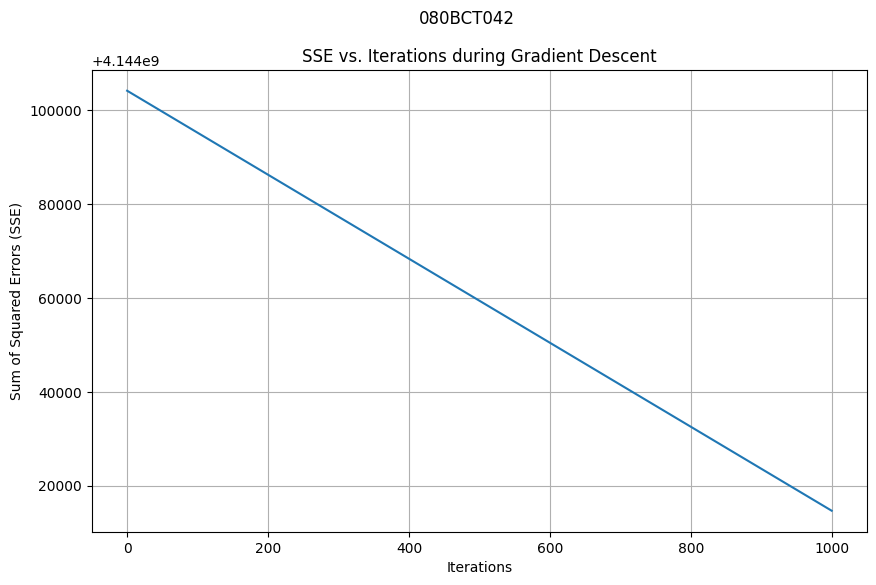

Final Coefficients after 1,000 iterations:
beta0: 0.011932545233373684
beta1: 0.026199717233449646
beta2: 0.005952740357292564
beta3: 0.005663647028432085


In [17]:
# Initialize coeffs with random values or specific values for beta0, beta1, beta2, beta3
coeffs = np.array([0, 0, 0, 0])  # Initialize the coefficients

# Calculate the new betas, making sure denominators are not zero
beta1 = coeffs[1] / (np.std(x1) if np.std(x1) != 0 else 1)  # Avoid division by zero
beta2 = coeffs[2] / (np.max(x2) - np.min(x2) if np.max(x2) != np.min(x2) else 1)
beta3 = coeffs[3] / (np.max(x3) - np.min(x3) if np.max(x3) != np.min(x3) else 1)

beta0 = coeffs[0] - (coeffs[1] * np.mean(x1) + beta2 * np.min(x2) + beta3 * np.min(x3))

# Recalculate coefficients
coeffs = np.array([beta0, beta1, beta2, beta3])

# Use StandardScaler to scale x1, MinMaxScaler to scale x2 and x3
std_scaler = StandardScaler()
x1_scaled = std_scaler.fit_transform(x1.reshape(-1, 1))

minmax_scaler = MinMaxScaler()
x2_scaled = minmax_scaler.fit_transform(x2.reshape(-1, 1))
x3_scaled = minmax_scaler.fit_transform(x3.reshape(-1, 1))

# Now, apply gradient descent to update the coefficients
sse_history, coeffs = grad_descent(coeffs, x1_scaled, x2_scaled, x3_scaled,Y_true, learning_rate=1e-11, iterations=1000)

# Plot SSE history (assuming plot_sse is a function to plot the history)
plot_sse(sse_history)

# Print final coefficients
print("Final Coefficients after 1,000 iterations:")
print(f"beta0: {coeffs[0]}")
print(f"beta1: {coeffs[1]}")
print(f"beta2: {coeffs[2]}")
print(f"beta3: {coeffs[3]}")



## comment

In **Question 3**, gradient descent is performed on unscaled data, leading to slower convergence and potential instability due to the large differences in feature scales (e.g., \(x_3\) ranging from 10,000 to 20,000). A very small learning rate is used to manage this issue, resulting in a slower decrease in SSE over iterations.

In **Question 4**, feature scaling is applied using StandardScaler for \(x_1\) and MinMaxScaler for \(x_2\) and \(x_3\). This scaling ensures that all features are on a similar scale, allowing gradient descent to converge faster and more smoothly. The learning rate can be increased, leading to quicker and more stable convergence, and the final coefficients are adjusted to compare with the unscaled scenario.

**Key Difference**: Feature scaling significantly improves the gradient descent process by enhancing stability, speeding up convergence, and making the results easier to interpret.

# Sigmoid Function

Recall the equation of simple linear regression.

$$\hat{y} = \beta_0 + \beta_1\ x$$

where  $\beta_0$ and $\beta_1$ are the regression coefficients and $x$ is the input feature.

In *logistic regression*, we pass the output of the linear regression $\hat{y}$ to a function known as the sigmoid function. The sigmoid function is of the following form:

$$\sigma(z) = \frac 1 {(1+ e^{-z})} $$


where $z$ is any input real number. So our regression model becomes: $p(x) = \frac 1 {(1+ e^{-(\beta_0 + \beta_1 x)})}$

# 5. Sigmoid Function:

 Plot the sigmoid function.
 
  Next plot the logistic regressionfor different values of parameter coefficients.

Take values for beta0 and beta1 as:

beta0= (your_roll_number) * 20, 

beta1 = (your_roll_number) / 20. 

Then change values of beta0 and beta1 and comment on how the output changes. 

C:\Users\regmi\AppData\Local\Temp\ipykernel_15196\2681592083.py:12: RuntimeWarning: overflow encountered in exp
  y_value.append(1/(1+np.exp(-y)))


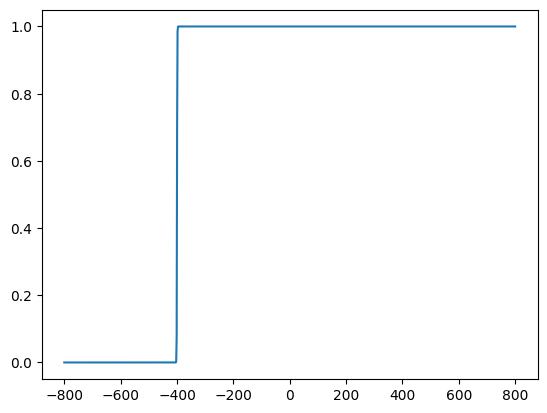

In [8]:
a = 42 * 20 # roll no * 20 
b = 42/ 20 # roll no/ 20

def fun_y(a, b, x):
  return (a+b*x)

def fun_sigmoid():
  x_value= np.linspace(-800, 800, 1000)
  y_value = []
  for x in x_value:
      y = fun_y(a, b, x)
      y_value.append(1/(1+np.exp(-y)))
  return x_value, y_value


x, y = fun_sigmoid()

plt.plot(x, y)

### Final Comments:

- **beta0** affects the *position* of the logistic curve (i.e., where the transition from 0 to 1 occurs).
- **beta1** affects the *steepness* or *rate of change* of the logistic curve. A larger beta1 makes the transition between 0 and 1 sharper, while a smaller beta1 results in a smoother transition.


## 6. Synthetic Classification Data Generation

Generate synthetic data to simulate the process of obtaining a scholarship based on GRE scores at a hypothetical university. A student will receive a scholarship if their GRE score is above 310, and will not receive a scholarship if their score is 310 or below. Additionally, introduce some randomness to simulate real-world data.


### Code:


In [21]:
gre_score= np.random.randint(240,  350, size = 200)


# scholarship status based on the threshold
scholarship_status = np.array([1 if score>=310 else 0 for score in gre_score])

print("Before:" , scholarship_status)

for i in range(len(scholarship_status)):
    a = np.random.random()
    if a<=0.1:
        scholarship_status[i] = 1-scholarship_status[i]
       
print("After:", scholarship_status) 



Before: [0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0
 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1]
After: [0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1
 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1]


# 7. Logistic Regression:
Fit logistic regression to data created in question 6 and plot the resulting logistic function.

Predict output for GRE score 320 (take confidence threshold; p = 0.5). 

Confirm your prediction using sklearn library.


In [19]:
# gre_score 
gre_score = gre_score.reshape(-1, 1)

model = LogisticRegression()
model.fit(gre_score, scholarship_status)


print("Ceffs: ", model.coef_[0][0])
print("Intercept: ", model.intercept_[0])


Ceffs:  0.05141358532303853
Intercept:  -15.588380761739682


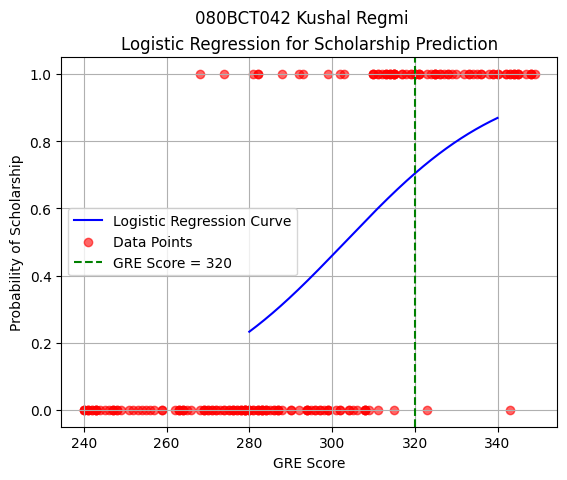

In [23]:
# Plot the logistic regression curve
x_range = np.linspace(280, 340, 1000).reshape(-1, 1)
y_prob = model.predict_proba(x_range)[:, 1]  # Probability of getting the scholarship

plt.plot(x_range, y_prob, color='blue', label="Logistic Regression Curve")
plt.scatter(gre_score, scholarship_status, color='red', label="Data Points", alpha=0.6)
plt.suptitle("080BCT042 Kushal Regmi")
plt.xlabel("GRE Score")
plt.ylabel("Probability of Scholarship")
plt.title("Logistic Regression for Scholarship Prediction")
plt.axvline(x=320, color='green', linestyle='--', label="GRE Score = 320")
plt.legend(loc='best')
plt.grid()
plt.show()

## Discussion 
In this lab, we explored several fundamental concepts in machine learning, including gradient descent, regression, feature scaling, and logistic regression.

### 1. Minimum of a Function Using Gradient Descent
Using gradient descent, we found the minimum of the function \( y = (x - 6)^2 + \sin(3x) \). The learning rate had a significant impact on convergence. A smaller learning rate provided stable but slower progress, while a larger learning rate caused instability.

### 2. Synthetic Regression Data Generation
We generated synthetic data with multiple features and noise. This data allowed us to simulate a real-world scenario where data has variability and noise, helping us better understand how models handle such inputs.

### 3. Regression Using Gradient Descent
We used gradient descent to fit a regression model to the synthetic data. The learning rate needed to be small due to the large values in the data, which showed how important parameter tuning is for successful model convergence.

### 4. Feature Scaling
Feature scaling improved the performance of gradient descent, especially for features with large ranges. Scaling allowed the model to converge more quickly and stably, demonstrating the importance of preprocessing data for gradient-based optimization methods.

### 5. Sigmoid Function
The sigmoid function mapped values between 0 and 1, making it suitable for binary classification. By adjusting the coefficients, we observed how the sigmoid curve's shape changed, illustrating the role of model parameters in determining the decision boundary.

### 6. Synthetic Classification Data Generation
We generated classification data based on GRE scores and added noise by inverting some of the labels. This mimicked real-world data irregularities and helped practice classification tasks with imperfect data.

### 7. Logistic Regression
Using logistic regression, we predicted whether a student with a GRE score of 320 would receive a scholarship. The modelâ€™s performance was confirmed with scikit-learn, validating our approach to binary classification.

---

### Conclusion
This lab provided practical experience in applying gradient descent, regression, feature scaling, and logistic regression. We learned the importance of parameter tuning, the effect of feature scaling on model performance, and how to apply logistic regression for both regression and classification tasks. Overall, it deepened our understanding of key machine learning techniques and their practical applications.
